# Analysis of results for the GAT with MUTAG data

In [1]:
# imports needed:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from statistics import stdev as std
from scipy import stats
import random
import math
import modcomp
import json
import numpy as np

random.seed(0)

## Read in data:

In [2]:
results_filtered_1 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_1/results.csv")
results_filtered_2 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_2/results.csv")
results_filtered_3 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_3/results.csv")
results_filtered_4 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_4/results.csv")
results_filtered_5 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_5/results.csv")
results_filtered_6 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_6/results.csv")
results_filtered_7 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_7/results.csv")
results_filtered_8 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_8/results.csv")
results_filtered_9 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_9/results.csv")
results_filtered_10 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_10/results.csv")

results_alltoone_1 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_1/results.csv")
results_alltoone_2 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_2/results.csv")
results_alltoone_3 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_3/results.csv")
results_alltoone_4 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_4/results.csv")
results_alltoone_5 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_5/results.csv")
results_alltoone_6 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_6/results.csv")
results_alltoone_7 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_7/results.csv")
results_alltoone_8 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_8/results.csv")
results_alltoone_9 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_9/results.csv")
results_alltoone_10 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_10/results.csv")

results_collapsed_1 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_1/results.csv")
results_collapsed_2 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_2/results.csv")
results_collapsed_3 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_3/results.csv")
results_collapsed_4 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_4/results.csv")
results_collapsed_5 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_5/results.csv")
results_collapsed_6 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_6/results.csv")
results_collapsed_7 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_7/results.csv")
results_collapsed_8 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_8/results.csv")
results_collapsed_9 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_9/results.csv")
results_collapsed_10 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_10/results.csv")

results_separate_1 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_1/results.csv")
results_separate_2 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_2/results.csv")
results_separate_3 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_3/results.csv")
results_separate_4 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_4/results.csv")
results_separate_5 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_5/results.csv")
results_separate_6 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_6/results.csv")
results_separate_7 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_7/results.csv")
results_separate_8 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_8/results.csv")
results_separate_9 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_9/results.csv")
results_separate_10 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_10/results.csv")

## Process data:

In [3]:
# combine the test accuracies
accuracy_test_filtered = pd.concat([results_filtered_1['AccTest'], results_filtered_2['AccTest'], results_filtered_3['AccTest'], results_filtered_4['AccTest'], results_filtered_5['AccTest'],results_filtered_6['AccTest'], results_filtered_7['AccTest'], results_filtered_8['AccTest'], results_filtered_9['AccTest'], results_filtered_10['AccTest']],axis=1)
accuracy_test_alltoone = pd.concat([results_alltoone_1['AccTest'], results_alltoone_2['AccTest'], results_alltoone_3['AccTest'], results_alltoone_4['AccTest'], results_alltoone_5['AccTest'],results_alltoone_6['AccTest'], results_alltoone_7['AccTest'], results_alltoone_8['AccTest'], results_alltoone_9['AccTest'], results_alltoone_10['AccTest']],axis=1)
accuracy_test_collapsed = pd.concat([results_collapsed_1['AccTest'], results_collapsed_2['AccTest'], results_collapsed_3['AccTest'], results_collapsed_4['AccTest'], results_collapsed_5['AccTest'],results_collapsed_6['AccTest'], results_collapsed_7['AccTest'], results_collapsed_8['AccTest'], results_collapsed_9['AccTest'], results_collapsed_10['AccTest']],axis=1)
accuracy_test_separate = pd.concat([results_separate_1['AccTest'], results_separate_2['AccTest'], results_separate_3['AccTest'], results_separate_4['AccTest'], results_separate_5['AccTest'],results_separate_6['AccTest'], results_separate_7['AccTest'], results_separate_8['AccTest'], results_separate_9['AccTest'], results_separate_10['AccTest']],axis=1)

# make lists of the final test accuracies
final_accuracy_test_filtered = [results_filtered_1['AccTest'].iloc[-1], results_filtered_2['AccTest'].iloc[-1], results_filtered_3['AccTest'].iloc[-1], results_filtered_4['AccTest'].iloc[-1], results_filtered_5['AccTest'].iloc[-1],results_filtered_6['AccTest'].iloc[-1], results_filtered_7['AccTest'].iloc[-1], results_filtered_8['AccTest'].iloc[-1], results_filtered_9['AccTest'].iloc[-1], results_filtered_10['AccTest'].iloc[-1]]
final_accuracy_test_alltoone = [results_alltoone_1['AccTest'].iloc[-1], results_alltoone_2['AccTest'].iloc[-1], results_alltoone_3['AccTest'].iloc[-1], results_alltoone_4['AccTest'].iloc[-1], results_alltoone_5['AccTest'].iloc[-1],results_alltoone_6['AccTest'].iloc[-1], results_alltoone_7['AccTest'].iloc[-1], results_alltoone_8['AccTest'].iloc[-1], results_alltoone_9['AccTest'].iloc[-1], results_alltoone_10['AccTest'].iloc[-1]]
final_accuracy_test_collapsed = [results_collapsed_1['AccTest'].iloc[-1], results_collapsed_2['AccTest'].iloc[-1], results_collapsed_3['AccTest'].iloc[-1], results_collapsed_4['AccTest'].iloc[-1], results_collapsed_5['AccTest'].iloc[-1],results_collapsed_6['AccTest'].iloc[-1], results_collapsed_7['AccTest'].iloc[-1], results_collapsed_8['AccTest'].iloc[-1], results_collapsed_9['AccTest'].iloc[-1], results_collapsed_10['AccTest'].iloc[-1]]
final_accuracy_test_separate = [results_separate_1['AccTest'].iloc[-1], results_separate_2['AccTest'].iloc[-1], results_separate_3['AccTest'].iloc[-1], results_separate_4['AccTest'].iloc[-1], results_separate_5['AccTest'].iloc[-1],results_separate_6['AccTest'].iloc[-1], results_separate_7['AccTest'].iloc[-1], results_separate_8['AccTest'].iloc[-1], results_separate_9['AccTest'].iloc[-1], results_separate_10['AccTest'].iloc[-1]]

# combine the test f1
f1_test_filtered = pd.concat([results_filtered_1['f1Test'], results_filtered_2['f1Test'], results_filtered_3['f1Test'], results_filtered_4['f1Test'], results_filtered_5['f1Test'],results_filtered_6['f1Test'], results_filtered_7['f1Test'], results_filtered_8['f1Test'], results_filtered_9['f1Test'], results_filtered_10['f1Test']],axis=1)
f1_test_alltoone = pd.concat([results_alltoone_1['f1Test'], results_alltoone_2['f1Test'], results_alltoone_3['f1Test'], results_alltoone_4['f1Test'], results_alltoone_5['f1Test'],results_alltoone_6['f1Test'], results_alltoone_7['f1Test'], results_alltoone_8['f1Test'], results_alltoone_9['f1Test'], results_alltoone_10['f1Test']],axis=1)
f1_test_collapsed = pd.concat([results_collapsed_1['f1Test'], results_collapsed_2['f1Test'], results_collapsed_3['f1Test'], results_collapsed_4['f1Test'], results_collapsed_5['f1Test'],results_collapsed_6['f1Test'], results_collapsed_7['f1Test'], results_collapsed_8['f1Test'], results_collapsed_9['f1Test'], results_collapsed_10['f1Test']],axis=1)
f1_test_separate = pd.concat([results_separate_1['f1Test'], results_separate_2['f1Test'], results_separate_3['f1Test'], results_separate_4['f1Test'], results_separate_5['f1Test'],results_separate_6['f1Test'], results_separate_7['f1Test'], results_separate_8['f1Test'], results_separate_9['f1Test'], results_separate_10['f1Test']],axis=1)

# make lists of the final test f1
final_f1_test_filtered = [results_filtered_1['f1Test'].iloc[-1], results_filtered_2['f1Test'].iloc[-1], results_filtered_3['f1Test'].iloc[-1], results_filtered_4['f1Test'].iloc[-1], results_filtered_5['f1Test'].iloc[-1],results_filtered_6['f1Test'].iloc[-1], results_filtered_7['f1Test'].iloc[-1], results_filtered_8['f1Test'].iloc[-1], results_filtered_9['f1Test'].iloc[-1], results_filtered_10['f1Test'].iloc[-1]]
final_f1_test_alltoone = [results_alltoone_1['f1Test'].iloc[-1], results_alltoone_2['f1Test'].iloc[-1], results_alltoone_3['f1Test'].iloc[-1], results_alltoone_4['f1Test'].iloc[-1], results_alltoone_5['f1Test'].iloc[-1],results_alltoone_6['f1Test'].iloc[-1], results_alltoone_7['f1Test'].iloc[-1], results_alltoone_8['f1Test'].iloc[-1], results_alltoone_9['f1Test'].iloc[-1], results_alltoone_10['f1Test'].iloc[-1]]
final_f1_test_collapsed = [results_collapsed_1['f1Test'].iloc[-1], results_collapsed_2['f1Test'].iloc[-1], results_collapsed_3['f1Test'].iloc[-1], results_collapsed_4['f1Test'].iloc[-1], results_collapsed_5['f1Test'].iloc[-1],results_collapsed_6['f1Test'].iloc[-1], results_collapsed_7['f1Test'].iloc[-1], results_collapsed_8['f1Test'].iloc[-1], results_collapsed_9['f1Test'].iloc[-1], results_collapsed_10['f1Test'].iloc[-1]]
final_f1_test_separate = [results_separate_1['f1Test'].iloc[-1], results_separate_2['f1Test'].iloc[-1], results_separate_3['f1Test'].iloc[-1], results_separate_4['f1Test'].iloc[-1], results_separate_5['f1Test'].iloc[-1],results_separate_6['f1Test'].iloc[-1], results_separate_7['f1Test'].iloc[-1], results_separate_8['f1Test'].iloc[-1], results_separate_9['f1Test'].iloc[-1], results_separate_10['f1Test'].iloc[-1]]

In [4]:
# accuracy:
mean_acc_filtered = accuracy_test_filtered.mean(axis=1)
mean_acc_alltoone = accuracy_test_alltoone.mean(axis=1)
mean_acc_collapsed = accuracy_test_collapsed.mean(axis=1)
mean_acc_separate = accuracy_test_separate.mean(axis=1)

std_acc_filtered = accuracy_test_filtered.std(axis=1)
std_acc_alltoone = accuracy_test_alltoone.std(axis=1)
std_acc_collapsed = accuracy_test_collapsed.std(axis=1)
std_acc_separate = accuracy_test_separate.std(axis=1)

# f1:
mean_f1_filtered = f1_test_filtered.mean(axis=1)
mean_f1_alltoone = f1_test_alltoone.mean(axis=1)
mean_f1_collapsed = f1_test_collapsed.mean(axis=1)
mean_f1_separate = f1_test_separate.mean(axis=1)

std_f1_filtered = f1_test_filtered.std(axis=1)
std_f1_alltoone = f1_test_alltoone.std(axis=1)
std_f1_collapsed = f1_test_collapsed.std(axis=1)
std_f1_separate = f1_test_separate.std(axis=1)

## Summary of data (means and standard deviations at the end):

In [5]:
print("Filtered gets a mean accuracy of ", mean(final_accuracy_test_filtered), " with a standard deviation of ", std(final_accuracy_test_filtered))
print("Filtered gets a mean f1 of ", mean(final_f1_test_filtered), " with a standard deviation of ", std(final_f1_test_filtered))
print()
print("All-to-one gets a mean accuracy of ", mean(final_accuracy_test_alltoone), " with a standard deviation of ", std(final_accuracy_test_alltoone))
print("All-to-one gets a mean f1 of ", mean(final_f1_test_alltoone), " with a standard deviation of ", std(final_f1_test_alltoone))
print()
print("Collapsed gets a mean accuracy of ", mean(final_accuracy_test_collapsed), " with a standard deviation of ", std(final_accuracy_test_collapsed))
print("Collapsed gets a mean f1 of ", mean(final_f1_test_collapsed), " with a standard deviation of ", std(final_f1_test_collapsed))
print()
print("Separate gets a mean accuracy of ", mean(final_accuracy_test_separate), " with a standard deviation of ", std(final_accuracy_test_separate))
print("Separate gets a mean f1 of ", mean(final_f1_test_separate), " with a standard deviation of ", std(final_f1_test_separate))

Filtered gets a mean accuracy of  0.6617647058823529  with a standard deviation of  0.0
Filtered gets a mean f1 of  0.5270692347735554  with a standard deviation of  0.0

All-to-one gets a mean accuracy of  0.6617647058823529  with a standard deviation of  0.0
All-to-one gets a mean f1 of  0.5270692347735554  with a standard deviation of  0.0

Collapsed gets a mean accuracy of  0.6647058823529411  with a standard deviation of  0.009300816647554059
Collapsed gets a mean f1 of  0.5368815052451297  with a standard deviation of  0.031029123707789406

Separate gets a mean accuracy of  0.6602941176470588  with a standard deviation of  0.004650408323777012
Separate gets a mean f1 of  0.5337231710247067  with a standard deviation of  0.021041593959200165


## Create plots of this data:

### Lineplot:

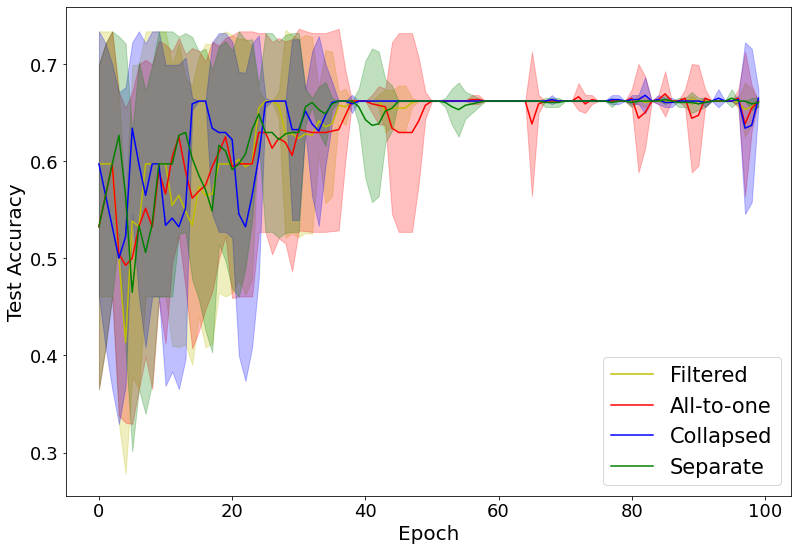

In [6]:
# draw the lines for the means
plt.plot(mean_acc_filtered.index.values, mean_acc_filtered, 'y-', label='Filtered')
plt.plot(mean_acc_alltoone.index.values, mean_acc_alltoone, 'r-', label='All-to-one')
plt.plot(mean_acc_collapsed.index.values, mean_acc_collapsed, 'b-', label='Collapsed')
plt.plot(mean_acc_separate.index.values, mean_acc_separate, 'g-', label='Separate')

# fill between the standard deviations
plt.fill_between(std_acc_filtered.index.values, mean_acc_filtered - std_acc_filtered, mean_acc_filtered + std_acc_filtered, color='y', alpha=0.25)
plt.fill_between(std_acc_alltoone.index.values, mean_acc_alltoone - std_acc_alltoone, mean_acc_alltoone + std_acc_alltoone, color='r', alpha=0.25)
plt.fill_between(std_acc_collapsed.index.values, mean_acc_collapsed - std_acc_collapsed, mean_acc_collapsed + std_acc_collapsed, color='b', alpha=0.25)
plt.fill_between(std_acc_separate.index.values, mean_acc_separate - std_acc_separate, mean_acc_separate + std_acc_separate, color='g', alpha=0.25)

plt.legend(loc="lower right", fontsize=21)
# plt.title("Test Accuracy of GAT for MUTAG Dataset with Different Literal Mappings", fontsize=19)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Test Accuracy', fontsize=20)

# increase size of figure
figure = plt.gcf()
figure.set_size_inches(13, 9)

# save the figure
figure.savefig('../plots/experiment_data_analysis/mutag/gat_test_acc.png', dpi=300)

plt.show()

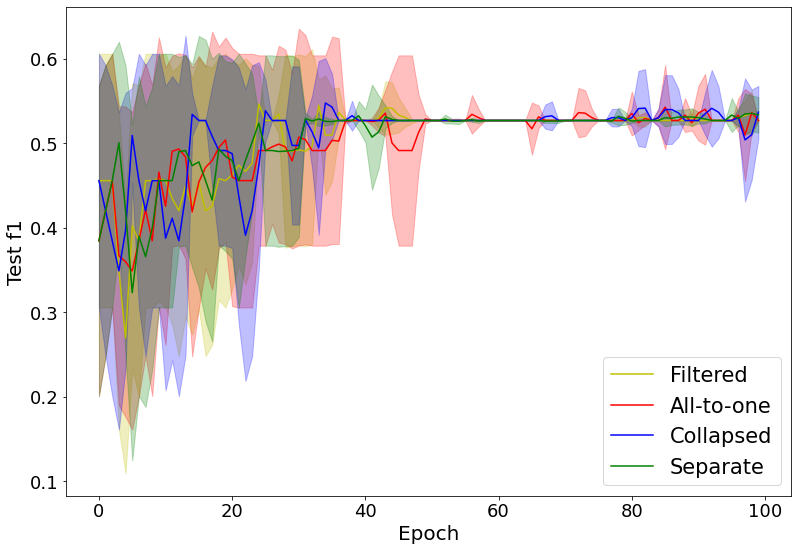

In [7]:
# draw the lines for the means
plt.plot(mean_f1_filtered.index.values, mean_f1_filtered, 'y-', label='Filtered')
plt.plot(mean_f1_alltoone.index.values, mean_f1_alltoone, 'r-', label='All-to-one')
plt.plot(mean_f1_collapsed.index.values, mean_f1_collapsed, 'b-', label='Collapsed')
plt.plot(mean_f1_separate.index.values, mean_f1_separate, 'g-', label='Separate')

# fill between the standard deviations
plt.fill_between(std_f1_filtered.index.values, mean_f1_filtered - std_f1_filtered, mean_f1_filtered + std_f1_filtered, color='y', alpha=0.25)
plt.fill_between(std_f1_alltoone.index.values, mean_f1_alltoone - std_f1_alltoone, mean_f1_alltoone + std_f1_alltoone, color='r', alpha=0.25)
plt.fill_between(std_f1_collapsed.index.values, mean_f1_collapsed - std_f1_collapsed, mean_f1_collapsed + std_f1_collapsed, color='b', alpha=0.25)
plt.fill_between(std_f1_separate.index.values, mean_f1_separate - std_f1_separate, mean_f1_separate + std_f1_separate, color='g', alpha=0.25)

plt.legend(loc="lower right", fontsize=21)
# plt.title("Test f1 of GAT for MUTAG Dataset with Different Literal Mappings", fontsize=19)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Test f1', fontsize=20)

# increase size of figure
figure = plt.gcf()
figure.set_size_inches(13, 9)

# save the figure
figure.savefig('../plots/experiment_data_analysis/mutag/gat_test_f1.png', dpi=300)
plt.show()

### Boxplot:

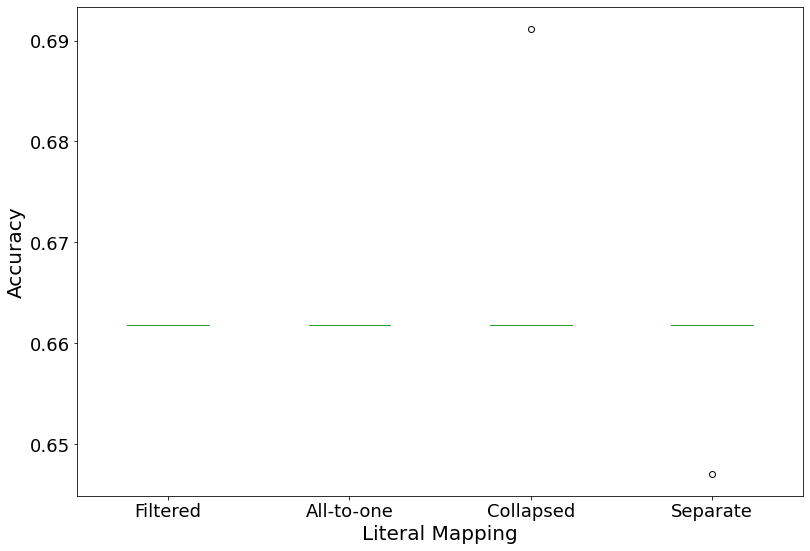

In [8]:
final_acc_all = pd.DataFrame({"Filtered": final_accuracy_test_filtered, "All-to-one": final_accuracy_test_alltoone, "Collapsed": final_accuracy_test_collapsed, "Separate": final_accuracy_test_separate})
final_acc_all[['Filtered', 'All-to-one', 'Collapsed', "Separate"]].plot(kind='box')

# add x and y labels and change font sizes:
plt.xlabel('Literal Mapping', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)

# increase size of figure
figure = plt.gcf()
figure.set_size_inches(13, 9)

# save the figure
figure.savefig('../plots/experiment_data_analysis/mutag/gat_boxplot_accuracy.png', dpi=300)
plt.show()

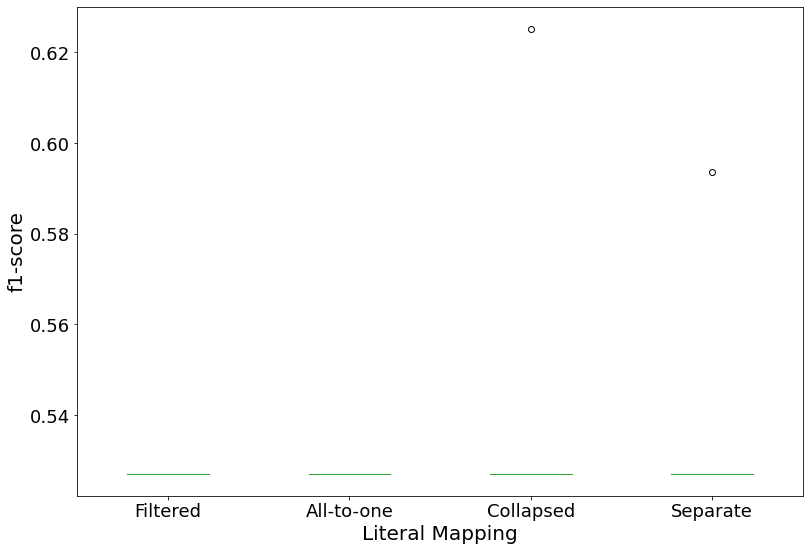

In [9]:
final_acc_all = pd.DataFrame({"Filtered": final_f1_test_filtered, "All-to-one": final_f1_test_alltoone, "Collapsed": final_f1_test_collapsed, "Separate": final_f1_test_separate})
final_acc_all[['Filtered', 'All-to-one', 'Collapsed', "Separate"]].plot(kind='box')

# add x and y labels and change font sizes:
plt.xlabel('Literal Mapping', fontsize=20)
plt.ylabel('f1-score', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)

# increase size of figure
figure = plt.gcf()
figure.set_size_inches(13, 9)

# save the figure
figure.savefig('../plots/experiment_data_analysis/mutag/gat_boxplot_f1.png', dpi=300)
plt.show()

## Perform statistical analysis:

### Normality tests (not needed):

In [10]:
print("------Accuracy------")
print("Filtered:", stats.shapiro(final_accuracy_test_filtered))
print("All-to-one:", stats.shapiro(final_accuracy_test_alltoone)) # not from a normal dist
print("Collapsed:", stats.shapiro(final_accuracy_test_collapsed))
print("Separate:", stats.shapiro(final_accuracy_test_separate))

print("------f1------")
print("Filtered:", stats.shapiro(final_f1_test_filtered))
print("All-to-one:", stats.shapiro(final_f1_test_alltoone)) # not from a normal dist
print("Collapsed:", stats.shapiro(final_f1_test_collapsed))
print("Separate:", stats.shapiro(final_f1_test_separate))

------Accuracy------
Filtered: ShapiroResult(statistic=1.0, pvalue=1.0)
All-to-one: ShapiroResult(statistic=1.0, pvalue=1.0)
Collapsed: ShapiroResult(statistic=0.36572057008743286, pvalue=1.0036932707180313e-07)
Separate: ShapiroResult(statistic=0.36572062969207764, pvalue=1.0036932707180313e-07)
------f1------
Filtered: ShapiroResult(statistic=1.0, pvalue=1.0)
All-to-one: ShapiroResult(statistic=1.0, pvalue=1.0)
Collapsed: ShapiroResult(statistic=0.36572057008743286, pvalue=1.0036932707180313e-07)
Separate: ShapiroResult(statistic=0.36572057008743286, pvalue=1.0036932707180313e-07)


/Users/janneke/opt/anaconda3/envs/Master-Thesis-Graph-Representation/lib/python3.9/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


### Mann-Whitney U tests:

In [11]:
# combinations (for all of these, do a test between both the accuracy and the f1)

# filtered - all-to-one
print("Accuracy, Filtered - All-to-one: ", stats.mannwhitneyu(final_accuracy_test_filtered, final_accuracy_test_alltoone))
print("f1-score, Filtered - All-to-one: ", stats.mannwhitneyu(final_f1_test_filtered, final_f1_test_alltoone))

# filtered - collapsed
print("Accuracy, Filtered - Collapsed: ", stats.mannwhitneyu(final_accuracy_test_filtered, final_accuracy_test_collapsed))
print("f1-score, Filtered - Collapsed: ", stats.mannwhitneyu(final_f1_test_filtered, final_f1_test_collapsed))

# filtered - separate
print("Accuracy, Filtered - Separate: ", stats.mannwhitneyu(final_accuracy_test_filtered, final_accuracy_test_separate))
print("f1-score, Filtered - Separate: ", stats.mannwhitneyu(final_f1_test_filtered, final_f1_test_separate))

# all-to-one - collapsed
print("Accuracy, All-to-one - Collapsed: ", stats.mannwhitneyu(final_accuracy_test_alltoone, final_accuracy_test_collapsed))
print("f1-score, All-to-one - Collapsed: ", stats.mannwhitneyu(final_f1_test_alltoone, final_f1_test_collapsed))

# all-to-one - separate
print("Accuracy, All-to-one - Separate: ", stats.mannwhitneyu(final_accuracy_test_alltoone, final_accuracy_test_separate))
print("f1-score, All-to-one - Separate: ", stats.mannwhitneyu(final_f1_test_alltoone, final_f1_test_separate))
      
# collapsed - separate
print("Accuracy, Collapsed - Separate: ", stats.mannwhitneyu(final_accuracy_test_collapsed, final_accuracy_test_separate))
print("f1-score, Collapsed - Separate: ", stats.mannwhitneyu(final_f1_test_collapsed, final_f1_test_separate))

Accuracy, Filtered - All-to-one:  MannwhitneyuResult(statistic=50.0, pvalue=1.0)
f1-score, Filtered - All-to-one:  MannwhitneyuResult(statistic=50.0, pvalue=1.0)
Accuracy, Filtered - Collapsed:  MannwhitneyuResult(statistic=45.0, pvalue=0.36812025069351895)
f1-score, Filtered - Collapsed:  MannwhitneyuResult(statistic=45.0, pvalue=0.36812025069351895)
Accuracy, Filtered - Separate:  MannwhitneyuResult(statistic=55.0, pvalue=0.36812025069351895)
f1-score, Filtered - Separate:  MannwhitneyuResult(statistic=45.0, pvalue=0.36812025069351895)
Accuracy, All-to-one - Collapsed:  MannwhitneyuResult(statistic=45.0, pvalue=0.36812025069351895)
f1-score, All-to-one - Collapsed:  MannwhitneyuResult(statistic=45.0, pvalue=0.36812025069351895)
Accuracy, All-to-one - Separate:  MannwhitneyuResult(statistic=55.0, pvalue=0.36812025069351895)
f1-score, All-to-one - Separate:  MannwhitneyuResult(statistic=45.0, pvalue=0.36812025069351895)
Accuracy, Collapsed - Separate:  MannwhitneyuResult(statistic=59.5

### Apply majority voting (for other classification tests):

In [12]:
# read in the class assignments (do this for the test data):
preds_filtered_1 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_1/predictions_test.csv")
preds_filtered_2 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_2/predictions_test.csv")
preds_filtered_3 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_3/predictions_test.csv")
preds_filtered_4 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_4/predictions_test.csv")
preds_filtered_5 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_5/predictions_test.csv")
preds_filtered_6 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_6/predictions_test.csv")
preds_filtered_7 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_7/predictions_test.csv")
preds_filtered_8 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_8/predictions_test.csv")
preds_filtered_9 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_9/predictions_test.csv")
preds_filtered_10 = pd.read_csv("../results/GAT/test_mutag_filtered_final/mutag_10/predictions_test.csv")

preds_alltoone_1 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_1/predictions_test.csv")
preds_alltoone_2 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_2/predictions_test.csv")
preds_alltoone_3 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_3/predictions_test.csv")
preds_alltoone_4 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_4/predictions_test.csv")
preds_alltoone_5 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_5/predictions_test.csv")
preds_alltoone_6 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_6/predictions_test.csv")
preds_alltoone_7 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_7/predictions_test.csv")
preds_alltoone_8 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_8/predictions_test.csv")
preds_alltoone_9 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_9/predictions_test.csv")
preds_alltoone_10 = pd.read_csv("../results/GAT/test_mutag_all-to-one_final/mutag_10/predictions_test.csv")

preds_collapsed_1 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_1/predictions_test.csv")
preds_collapsed_2 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_2/predictions_test.csv")
preds_collapsed_3 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_3/predictions_test.csv")
preds_collapsed_4 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_4/predictions_test.csv")
preds_collapsed_5 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_5/predictions_test.csv")
preds_collapsed_6 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_6/predictions_test.csv")
preds_collapsed_7 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_7/predictions_test.csv")
preds_collapsed_8 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_8/predictions_test.csv")
preds_collapsed_9 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_9/predictions_test.csv")
preds_collapsed_10 = pd.read_csv("../results/GAT/test_mutag_collapsed_final/mutag_10/predictions_test.csv")

preds_separate_1 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_1/predictions_test.csv")
preds_separate_2 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_2/predictions_test.csv")
preds_separate_3 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_3/predictions_test.csv")
preds_separate_4 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_4/predictions_test.csv")
preds_separate_5 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_5/predictions_test.csv")
preds_separate_6 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_6/predictions_test.csv")
preds_separate_7 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_7/predictions_test.csv")
preds_separate_8 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_8/predictions_test.csv")
preds_separate_9 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_9/predictions_test.csv")
preds_separate_10 = pd.read_csv("../results/GAT/test_mutag_separate_final/mutag_10/predictions_test.csv")

In [13]:
preds_filtered_1.rename(columns={"PredictedLabel":"P1"}, inplace=True)
preds_filtered_2.rename(columns={"PredictedLabel":"P2"}, inplace=True)
preds_filtered_3.rename(columns={"PredictedLabel":"P3"}, inplace=True)
preds_filtered_4.rename(columns={"PredictedLabel":"P4"}, inplace=True)
preds_filtered_5.rename(columns={"PredictedLabel":"P5"}, inplace=True)
preds_filtered_6.rename(columns={"PredictedLabel":"P6"}, inplace=True)
preds_filtered_7.rename(columns={"PredictedLabel":"P7"}, inplace=True)
preds_filtered_8.rename(columns={"PredictedLabel":"P8"}, inplace=True)
preds_filtered_9.rename(columns={"PredictedLabel":"P9"}, inplace=True)
preds_filtered_10.rename(columns={"PredictedLabel":"P10"}, inplace=True)

preds_alltoone_1.rename(columns={"PredictedLabel":"P1"}, inplace=True)
preds_alltoone_2.rename(columns={"PredictedLabel":"P2"}, inplace=True)
preds_alltoone_3.rename(columns={"PredictedLabel":"P3"}, inplace=True)
preds_alltoone_4.rename(columns={"PredictedLabel":"P4"}, inplace=True)
preds_alltoone_5.rename(columns={"PredictedLabel":"P5"}, inplace=True)
preds_alltoone_6.rename(columns={"PredictedLabel":"P6"}, inplace=True)
preds_alltoone_7.rename(columns={"PredictedLabel":"P7"}, inplace=True)
preds_alltoone_8.rename(columns={"PredictedLabel":"P8"}, inplace=True)
preds_alltoone_9.rename(columns={"PredictedLabel":"P9"}, inplace=True)
preds_alltoone_10.rename(columns={"PredictedLabel":"P10"}, inplace=True)

preds_collapsed_1.rename(columns={"PredictedLabel":"P1"}, inplace=True)
preds_collapsed_2.rename(columns={"PredictedLabel":"P2"}, inplace=True)
preds_collapsed_3.rename(columns={"PredictedLabel":"P3"}, inplace=True)
preds_collapsed_4.rename(columns={"PredictedLabel":"P4"}, inplace=True)
preds_collapsed_5.rename(columns={"PredictedLabel":"P5"}, inplace=True)
preds_collapsed_6.rename(columns={"PredictedLabel":"P6"}, inplace=True)
preds_collapsed_7.rename(columns={"PredictedLabel":"P7"}, inplace=True)
preds_collapsed_8.rename(columns={"PredictedLabel":"P8"}, inplace=True)
preds_collapsed_9.rename(columns={"PredictedLabel":"P9"}, inplace=True)
preds_collapsed_10.rename(columns={"PredictedLabel":"P10"}, inplace=True)

preds_separate_1.rename(columns={"PredictedLabel":"P1"}, inplace=True)
preds_separate_2.rename(columns={"PredictedLabel":"P2"}, inplace=True)
preds_separate_3.rename(columns={"PredictedLabel":"P3"}, inplace=True)
preds_separate_4.rename(columns={"PredictedLabel":"P4"}, inplace=True)
preds_separate_5.rename(columns={"PredictedLabel":"P5"}, inplace=True)
preds_separate_6.rename(columns={"PredictedLabel":"P6"}, inplace=True)
preds_separate_7.rename(columns={"PredictedLabel":"P7"}, inplace=True)
preds_separate_8.rename(columns={"PredictedLabel":"P8"}, inplace=True)
preds_separate_9.rename(columns={"PredictedLabel":"P9"}, inplace=True)
preds_separate_10.rename(columns={"PredictedLabel":"P10"}, inplace=True)

In [14]:
predictions_all_filtered = preds_filtered_1

for dataframe in [preds_filtered_2, preds_filtered_3, preds_filtered_4, preds_filtered_5, preds_filtered_6, preds_filtered_7, preds_filtered_8, preds_filtered_9, preds_filtered_10]:
    predictions_all_filtered= pd.merge(predictions_all_filtered, dataframe)
                                      
predictions_all_filtered.set_index('ID', inplace=True)

# ----------------

predictions_all_alltoone = preds_alltoone_1

for dataframe in [preds_alltoone_2, preds_alltoone_3, preds_alltoone_4, preds_alltoone_5, preds_alltoone_6, preds_alltoone_7, preds_alltoone_8, preds_alltoone_9, preds_alltoone_10]:
    predictions_all_alltoone= pd.merge(predictions_all_alltoone, dataframe)
                                      
predictions_all_alltoone.set_index('ID', inplace=True)

# ----------------

predictions_all_collapsed = preds_collapsed_1

for dataframe in [preds_collapsed_2, preds_collapsed_3, preds_collapsed_4, preds_collapsed_5, preds_collapsed_6, preds_collapsed_7, preds_collapsed_8, preds_collapsed_9, preds_collapsed_10]:
    predictions_all_collapsed = pd.merge(predictions_all_collapsed, dataframe)
                                      
predictions_all_collapsed.set_index('ID', inplace=True)

# ----------------

predictions_all_separate = preds_separate_1

for dataframe in [preds_separate_2, preds_separate_3, preds_separate_4, preds_separate_5, preds_separate_6, preds_separate_7, preds_separate_8, preds_separate_9, preds_separate_10]:
    predictions_all_separate = pd.merge(predictions_all_separate, dataframe)
                                      
predictions_all_separate.set_index('ID', inplace=True)

In [15]:
predictions_filtered_mode = predictions_all_filtered[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']].mode(axis='columns')
predictions_alltoone_mode = predictions_all_alltoone[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']].mode(axis='columns')
predictions_collapsed_mode = predictions_all_collapsed[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']].mode(axis='columns')
predictions_separate_mode = predictions_all_separate[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']].mode(axis='columns')

In [16]:
print(predictions_filtered_mode.shape)
print(predictions_alltoone_mode.shape)
print(predictions_collapsed_mode.shape)
print(predictions_separate_mode.shape)

(68, 1)
(68, 1)
(68, 1)
(68, 1)


In [17]:
def make_choice(col_0, col_1):
    if not math.isnan(col_1) and random.choice([0,1]) == 1:
        return int(col_1)
    else:
        return int(col_0)

predictions_all_filtered['MJ'] = predictions_filtered_mode[0]
predictions_all_alltoone['MJ'] = predictions_alltoone_mode[0]
predictions_all_collapsed['MJ'] = predictions_collapsed_mode[0]
predictions_all_separate['MJ'] = predictions_separate_mode[0]

In [18]:
# these will all be different because they were read in differently:

filtered_file = open("../results/GAT/test_mutag_filtered_final/label_mapping.json")
filtered_mapping = json.load(filtered_file)
print(filtered_mapping)
print()

alltoone_file = open("../results/GAT/test_mutag_all-to-one_final/label_mapping.json")
alltoone_mapping = json.load(alltoone_file)
print(alltoone_mapping)
print()

collapsed_file = open("../results/GAT/test_mutag_collapsed_final/label_mapping.json")
collapsed_mapping = json.load(collapsed_file)
print(collapsed_mapping)
print()

separate_file = open("../results/GAT/test_mutag_separate_final/label_mapping.json")
separate_mapping = json.load(separate_file)
print(separate_mapping)
print()

{'false': 0, 'true': 1}

{'true': 0, 'false': 1}

{'false': 0, 'true': 1}

{'false': 0, 'true': 1}



In [19]:
# revert these (so we can turn the mapping back around!)
filtered_mapping_rev = {value: key for key, value in filtered_mapping.items()}
alltoone_mapping_rev = {value: key for key, value in alltoone_mapping.items()}
collapsed_mapping_rev = {value: key for key, value in collapsed_mapping.items()}
separate_mapping_rev = {value: key for key, value in separate_mapping.items()}

In [20]:
# change it back to the original classes:
predictions_all_filtered['MJ_fil'] = predictions_all_filtered['MJ'].map(filtered_mapping_rev)
predictions_all_alltoone['MJ_ato'] = predictions_all_alltoone['MJ'].map(alltoone_mapping_rev)
predictions_all_collapsed['MJ_col'] = predictions_all_collapsed['MJ'].map(collapsed_mapping_rev)
predictions_all_separate['MJ_sep'] = predictions_all_separate['MJ'].map(separate_mapping_rev)

In [21]:
# put the actual entities as the index for everything!
predictions_all_filtered.set_index('Entity', inplace=True)
predictions_all_alltoone.set_index('Entity', inplace=True)
predictions_all_collapsed.set_index('Entity', inplace=True)
predictions_all_separate.set_index('Entity', inplace=True)

In [22]:
predictions_all_filtered.head(5)

,P1,TrueLabel,P2,P3,P4,P5,P6,P7,P8,P9,P10,MJ,MJ_fil
Entity,,,,,,,,,,,,,
http://dl-learner.org/carcinogenesis#d83,0,0,0,0,0,0,0,0,0,0,0,0,false
http://dl-learner.org/carcinogenesis#d173,0,1,0,0,0,0,0,0,0,0,0,0,false
http://dl-learner.org/carcinogenesis#d180,0,1,0,0,0,0,0,0,0,0,0,0,false
http://dl-learner.org/carcinogenesis#d253,0,0,0,0,0,0,0,0,0,0,0,0,false
http://dl-learner.org/carcinogenesis#d112,0,1,0,0,0,0,0,0,0,0,0,0,false


In [23]:
# now, link everything to their actual entity and add everything in one dataframe --> then we can start comparing!
all_predictions = pd.concat([predictions_all_filtered['MJ_fil'], predictions_all_alltoone['MJ_ato'], predictions_all_collapsed['MJ_col'], predictions_all_separate['MJ_sep']], axis=1, keys=['filtered', 'all-to-one', 'collapsed', 'separate'])
all_predictions.head(5)

,filtered,all-to-one,collapsed,separate
Entity,,,,
http://dl-learner.org/carcinogenesis#d83,false,false,false,false
http://dl-learner.org/carcinogenesis#d173,false,false,false,false
http://dl-learner.org/carcinogenesis#d180,false,false,false,false
http://dl-learner.org/carcinogenesis#d253,false,false,false,false
http://dl-learner.org/carcinogenesis#d112,false,false,false,false


In [24]:
official_mapping = {'false': 0, "true": 1}

In [25]:
all_predictions['filtered'] = all_predictions['filtered'].map(official_mapping)
all_predictions['all-to-one'] = all_predictions['all-to-one'].map(official_mapping)
all_predictions['collapsed'] = all_predictions['collapsed'].map(official_mapping)
all_predictions['separate'] = all_predictions['separate'].map(official_mapping)

In [26]:
true_lab = predictions_all_filtered['TrueLabel'].map(filtered_mapping_rev)
all_predictions['true_label'] = true_lab.map(official_mapping)

In [27]:
all_predictions.head(10)

,filtered,all-to-one,collapsed,separate,true_label
Entity,,,,,
http://dl-learner.org/carcinogenesis#d83,0,0,0,0,0
http://dl-learner.org/carcinogenesis#d173,0,0,0,0,1
http://dl-learner.org/carcinogenesis#d180,0,0,0,0,1
http://dl-learner.org/carcinogenesis#d253,0,0,0,0,0
http://dl-learner.org/carcinogenesis#d112,0,0,0,0,1
http://dl-learner.org/carcinogenesis#d41,0,0,0,0,1
http://dl-learner.org/carcinogenesis#d232,0,0,0,0,0
http://dl-learner.org/carcinogenesis#d131,0,0,0,0,0
http://dl-learner.org/carcinogenesis#d123,0,0,0,0,1


### Other tests (mlstats package):

In [28]:
print("Number predicted classes in filtered: ", len(np.unique(all_predictions['filtered'].to_numpy())))
print("Number predicted classes in all-to-one: ", len(np.unique(all_predictions['all-to-one'].to_numpy())))
print("Number predicted classes in collapsed: ", len(np.unique(all_predictions['collapsed'].to_numpy())))
print("Number predicted classes in separate: ", len(np.unique(all_predictions['separate'].to_numpy())))

Number predicted classes in filtered:  1
Number predicted classes in all-to-one:  1
Number predicted classes in collapsed:  1
Number predicted classes in separate:  1


In [29]:
all_predictions_tf = all_predictions.copy()

In [30]:
def same(label, true_label):
    return int(label == true_label)

all_predictions_tf['filtered'] = all_predictions.apply(lambda x: same(x['filtered'], x['true_label']), axis=1)
all_predictions_tf['all-to-one'] = all_predictions.apply(lambda x: same(x['all-to-one'], x['true_label']), axis=1)
all_predictions_tf['collapsed'] = all_predictions.apply(lambda x: same(x['collapsed'], x['true_label']), axis=1)
all_predictions_tf['separate'] = all_predictions.apply(lambda x: same(x['separate'], x['true_label']), axis=1)

In [31]:
all_predictions_tf[['filtered', 'all-to-one', 'collapsed', 'separate']].head(10)

,filtered,all-to-one,collapsed,separate
Entity,,,,
http://dl-learner.org/carcinogenesis#d83,1,1,1,1
http://dl-learner.org/carcinogenesis#d173,0,0,0,0
http://dl-learner.org/carcinogenesis#d180,0,0,0,0
http://dl-learner.org/carcinogenesis#d253,1,1,1,1
http://dl-learner.org/carcinogenesis#d112,0,0,0,0
http://dl-learner.org/carcinogenesis#d41,0,0,0,0
http://dl-learner.org/carcinogenesis#d232,1,1,1,1
http://dl-learner.org/carcinogenesis#d131,1,1,1,1
http://dl-learner.org/carcinogenesis#d123,0,0,0,0


In [32]:
modcomp.cochran_q(all_predictions_tf[['filtered', 'all-to-one', 'collapsed', 'separate']].T.to_numpy())

/Users/janneke/Documents/GitHub/Master-Thesis-Graph-Representation/notebooks/modcomp.py:248: RuntimeWarning: invalid value encountered in double_scalars
  Q = numerator / denumerator


TestResults(p=nan, Q=nan)

In [33]:
# filtered - all-to-one
print("Exact McNemar between Correct/Incorrect, Filtered - All-to-one: ", modcomp.mcnemar(all_predictions_tf['filtered'].to_numpy(), all_predictions_tf['all-to-one'].to_numpy()))

# filtered - collapsed
print("Exact McNemar between Correct/Incorrect, Filtered - Collapsed: ", modcomp.mcnemar(all_predictions_tf['filtered'].to_numpy(), all_predictions_tf['collapsed'].to_numpy()))

# filtered - separate
print("Exact McNemar between Correct/Incorrect, Filtered - Separate: ", modcomp.mcnemar(all_predictions_tf['filtered'].to_numpy(), all_predictions_tf['separate'].to_numpy()))

# all-to-one - collapsed
print("Exact McNemar between Correct/Incorrect, All-to-one - Collapsed: ", modcomp.mcnemar(all_predictions_tf['all-to-one'].to_numpy(), all_predictions_tf['collapsed'].to_numpy()))

# all-to-one - separate
print("Exact McNemar between Correct/Incorrect, All-to-one - Separate: ", modcomp.mcnemar(all_predictions_tf['all-to-one'].to_numpy(), all_predictions_tf['separate'].to_numpy()))

# collapsed - separate
print("Exact McNemar between Correct/Incorrect, Collapsed - Separate: ", modcomp.mcnemar(all_predictions_tf['collapsed'].to_numpy(), all_predictions_tf['separate'].to_numpy()))

Exact McNemar between Correct/Incorrect, Filtered - All-to-one:  TestResults(p=0.007632881787792295, Q=7.117647058823529)
Exact McNemar between Correct/Incorrect, Filtered - Collapsed:  TestResults(p=0.007632881787792295, Q=7.117647058823529)
Exact McNemar between Correct/Incorrect, Filtered - Separate:  TestResults(p=0.007632881787792295, Q=7.117647058823529)
Exact McNemar between Correct/Incorrect, All-to-one - Collapsed:  TestResults(p=0.007632881787792295, Q=7.117647058823529)
Exact McNemar between Correct/Incorrect, All-to-one - Separate:  TestResults(p=0.007632881787792295, Q=7.117647058823529)
Exact McNemar between Correct/Incorrect, Collapsed - Separate:  TestResults(p=0.007632881787792295, Q=7.117647058823529)


In [34]:
from statsmodels.stats.contingency_tables import mcnemar
print("Filtered - All-to-one: ", mcnemar(pd.crosstab(all_predictions_tf['filtered'], all_predictions_tf['all-to-one']).to_numpy(), exact=True))
print(pd.crosstab(all_predictions_tf['filtered'], all_predictions_tf['all-to-one']))

print()
print("Filtered - Collapsed: ",mcnemar(pd.crosstab(all_predictions_tf['filtered'], all_predictions_tf['collapsed']).to_numpy(), exact=True))
print(pd.crosstab(all_predictions_tf['filtered'], all_predictions_tf['collapsed']))

print()
print("Filtered - Separate: ",mcnemar(pd.crosstab(all_predictions_tf['filtered'], all_predictions_tf['separate']).to_numpy(), exact=True))
print(pd.crosstab(all_predictions_tf['filtered'], all_predictions_tf['separate']))

print()
print("All-to-one - Collapsed: ",mcnemar(pd.crosstab(all_predictions_tf['all-to-one'], all_predictions_tf['collapsed']).to_numpy(), exact=True))
print(pd.crosstab(all_predictions_tf['all-to-one'], all_predictions_tf['collapsed']))

print()
print("All-to-one - Separate: ",mcnemar(pd.crosstab(all_predictions_tf['all-to-one'], all_predictions_tf['separate']).to_numpy(), exact=True))
print(pd.crosstab(all_predictions_tf['all-to-one'], all_predictions_tf['separate']))

print()
print("Collapsed - Separate: ",mcnemar(pd.crosstab(all_predictions_tf['collapsed'], all_predictions_tf['separate']).to_numpy(), exact=True))
print(pd.crosstab(all_predictions_tf['collapsed'], all_predictions_tf['separate']))

Filtered - All-to-one:  pvalue      1.0
statistic   0.0
all-to-one   0   1
filtered          
0           23   0
1            0  45

Filtered - Collapsed:  pvalue      1.0
statistic   0.0
collapsed   0   1
filtered         
0          23   0
1           0  45

Filtered - Separate:  pvalue      1.0
statistic   0.0
separate   0   1
filtered        
0         23   0
1          0  45

All-to-one - Collapsed:  pvalue      1.0
statistic   0.0
collapsed    0   1
all-to-one        
0           23   0
1            0  45

All-to-one - Separate:  pvalue      1.0
statistic   0.0
separate     0   1
all-to-one        
0           23   0
1            0  45

Collapsed - Separate:  pvalue      1.0
statistic   0.0
separate    0   1
collapsed        
0          23   0
1           0  45
